In [1]:
import pandas as pd
import numpy as np

In [13]:
data=pd.read_csv("data1.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

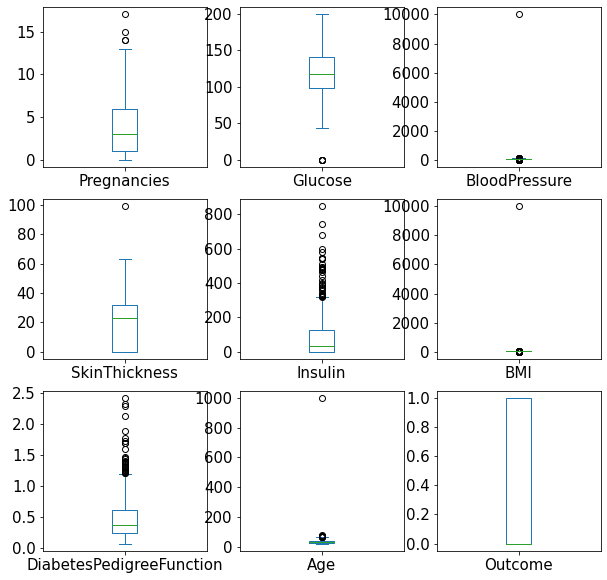

In [15]:
data.plot(kind='box',subplots=True,layout = (3,3),figsize=(10,10), fontsize=15)

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


In [17]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

결측치는 없음. BloodPressure, BMI, Age의 이상치를 최대값으로 대체하고 변수의 의미를 고려하여 Glucose, BloodPressure이 0인 변수가 있으면 중앙값으로 대체

In [18]:
data.loc[data.BloodPressure==data.BloodPressure.max(), 'BloodPressure']=data[data.BloodPressure!=data.BloodPressure.max()].BloodPressure.max()

In [19]:
data.loc[data.Age==data.Age.max(), 'Age']=data[data.Age!=data.Age.max()].Age.max()
data.loc[data.BMI==data.BMI.max(), 'BMI']=data[data.BMI!=data.BMI.max()].BMI.max()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

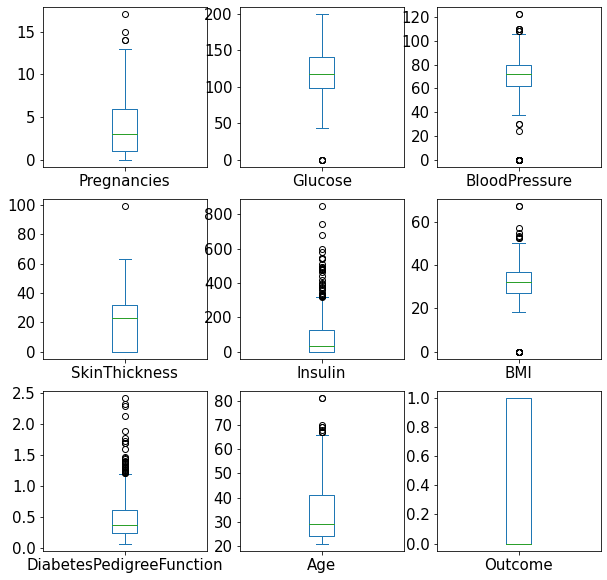

In [20]:
data.plot(kind='box',subplots=True,layout = (3,3),figsize=(10,10), fontsize=15)

In [24]:
pd.DataFrame(data[data.Age!=data.Age.max()].Age)

,Age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


In [25]:
outlier_index=data[data['Glucose']==0].index
data.loc[outlier_index, 'Glucose']=data.Glucose.median()
outlier_index=data[data['BloodPressure']==0].index
data.loc[outlier_index, 'BloodPressure']=data.BloodPressure.median()

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.397135,20.536458,79.799479,32.002604,0.471876,33.252604,0.348958
std,3.369578,30.438286,12.135903,15.952218,115.244002,7.923855,0.331329,11.803310,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [27]:
from imblearn.over_sampling import RandomOverSampler
X=data.drop(columns='Outcome')
y=data[['Outcome']]

In [30]:
ros=RandomOverSampler()
X_up, y_up=ros.fit_resample(X, y)
y_up.value_counts()

Outcome
0          500
1          500
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_train_resample, y_train_resample=smote.fit_resample(X_train, y_train)

In [39]:
y_train_resample.value_counts()

Outcome
0          400
1          400
dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_resample=pd.DataFrame(scaler.fit_transform(X_train_resample), columns=X_train_resample.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [45]:
import warnings
warnings.filterwarnings('ignore')

#logistic
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
log=LogisticRegression(random_state=0)

start=time.time()
log.fit(X_train_resample, y_train_resample)
end=time.time()

pred=log.predict(X_test)
print(round(end-start, 5))
print(accuracy_score(pred, y_test['Outcome']))

0.01197
0.7272727272727273


In [47]:
#xgb
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0)

start=time.time()
xgb.fit(X_train_resample, y_train_resample)
end=time.time()

pred=xgb.predict(X_test)
print(round(end-start, 5))
print(accuracy_score(pred, y_test['Outcome']))

[20:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4099
0.7467532467532467


In [51]:
#svm
import sklearn.svm as svm
svm=svm.SVC(kernel='linear')
start=time.time()
svm.fit(X_train_resample, y_train_resample)
end=time.time()

pred=svm.predict(X_test)
print(round(end-start, 5))
print(accuracy_score(pred, y_test['Outcome']))

0.05485
0.7337662337662337
